In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
plt.style.use('seaborn-v0_8-dark-palette')

In [15]:
X_data = []
Y_data = []

for i in range(100):
    point = np.random.randint(-25, 25, 2)
    X_data.append(point)
    Y_data.append(np.ones(1))
for i in range(100):
    point = np.random.randint(26, 50, 2)
    X_data.append(point)
    Y_data.append(np.zeros(1))

In [16]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [17]:
X_data.shape, Y_data.shape

((200, 2), (200, 1))

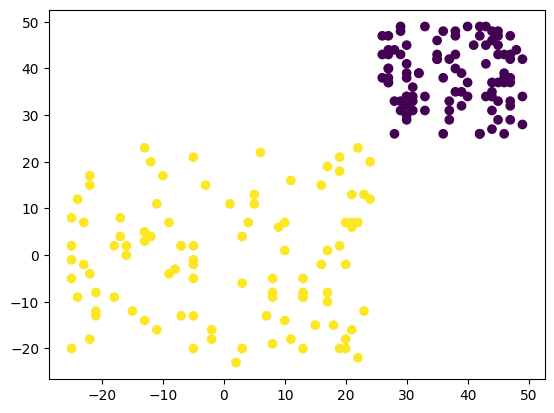

In [26]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data)

In [27]:
from sklearn.utils import shuffle
X_data, Y_data = shuffle(X_data, Y_data, random_state = 10)

split = 0.8
X_train = X_data[:int(split * X_data.shape[0]), :]
X_test = X_data[int(split * X_data.shape[0]):, :]
Y_train = Y_data[:int(split * X_data.shape[0]), :]
Y_test = Y_data[int(split * X_data.shape[0]):, :]

In [28]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(160, 2) (40, 2) (160, 1) (40, 1)


In [29]:
def distance_formula(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

In [30]:
distance_formula((2, 0), (2, 1))

1.0

In [53]:
class KNN:
    
    def __init__(self, k):
        self.k = k
        
    def data(self, X_data, Y_data):
        self.X = X_data
        self.Y = Y_data
    
    def distance_formula(self, p1, p2):
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    
    def predict(self, point):
        dist = []
        
        for i in range(self.X.shape[0]):
            dist.append((distance_formula(point, self.X[i]), i))
            
        dist = sorted(dist)
        distance = dist[:self.k]
        
        classes = []
        
        for dist, i in distance:
            classes.append(self.Y[i])
            
        unique_class, count = np.unique(classes, return_counts=True)
        
        max_class = np.argmax(count)
        
        print(f'Class: {unique_class[max_class]}, prob: {count[max_class]/self.k}')
        return unique_class[max_class], count[max_class]/self.k

In [61]:
knn = KNN(7)

In [62]:
knn.data(X_train, Y_train)

In [63]:
knn.predict((0, 0))

Class: 1.0, prob: 1.0


(1.0, 1.0)

In [64]:
corr = 0
for i in range(X_test.shape[0]):
    pred = knn.predict(X_test[i])
#     print(pred)
    if pred[0] == Y_test[i]:
        corr += 1
print(corr/X_test.shape[0])

Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 1.0, prob: 1.0
Class: 0.0, prob: 1.0
Class: 1.0, prob: 1.0
1.0


In [65]:
knn.predict([25, 25])

Class: 0.0, prob: 0.5714285714285714


(0.0, 0.5714285714285714)